## Importing Libraries

In [261]:
# Data handling and manipulation
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine learning models
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Model evaluation and metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset From Local Storage

In this step, we will load the dataset from local storage using **pandas**. We'll assume that the dataset is stored as a CSV file in your local directory. To load the dataset into a **pandas DataFrame**, we will use the `pd.read_csv()` function. This will allow us to work with the data, explore it, and perform data preprocessing steps such as cleaning and feature engineering.

In [265]:
data=pd.read_csv("aqi_data.csv")

 # Analysing the Dataset



In [268]:
data

rank                                           city  avg  jan  feb  mar  \
0        1                               Begusarai, India  223  413  337  250   
1        2                                   Patna, India  212  354  297  225   
2        3                                 Saharsa, India  207  418  344  238   
3        4                               New Delhi, India  205  325  244  167   
4        5                                   Noida, India  201  304  212  154   
5        6                                 Kashgar, China  197  283  175  288   
6        7                               Ghaziabad, India  190  302  216  155   
7        8                               Faridabad, India  186  295  210  149   
8        9                                    Aksu, China  185  210  141  285   
9       10                                  Purnea, India  182  398  305  218   
10      11                                  Meerut, India  180  279  251  156   
11      12                               Bhagalpur, India  179  373  263  179   
12      13                             Muzaffarpur, India  179  351  288  205   
13      14                                 Sonipat, India  179  231  194  142   
14      15                           Dubrovytsya, Ukraine  174    6    -    4   
15      16                                 Birganj, Nepal  171  326  289  201   
16      17                                Rajmahal, India  165  355  268  182   
17      18                           Muzaffarnagar, India  163  224  191  139   
18      19                               Balurghat, India  161  376  299  187   
19      20                              Dhaka, Bangladesh  161  303  195  184   
20      21                                 Bhiwadi, India  157  238  190  110   
21      22                            Ingraj Bazar, India  155  331  252  171   
22      23                                 Raiganj, India  153  367  296  187   
23      24                                  Rohtak, India  153  205  140   92   
24      25                                Agartala, India  150  256  231  181   
25      26                                 Ndjamena, Chad  147  221  326  189   
26      27                             Bulandshahr, India  141  210  149  108   
27      28                                  Zahedan, Iran  141   53   85   66   
28      29                             Peshawar, Pakistan  139  202  150  106   
29      30                                 Lucknow, India  138  212  170  119   
30      31                               Mahadipur, India  137  291  227  154   
31      32                                 Bhiwani, India  136  182  137  116   
32      33                                   Hapur, India  136  183  135   90   
33      34                                   Hisar, India  136  156  158  120   
34      35                                 Kairana, India  136  169  141  104   
35      36                                  Rajgir, India  136  317  164  116   
36      37                              Saharanpur, India  136  201  169  113   
37      38                                  Turpan, China  136  264  170  154   
38      39                                    Vapi, India  130  266  265  164   
39      40                               Lahore, Pakistan  126  245  153   85   
40      41                                    Bali, India  125  264  160  120   
41      42                               Gorakhpur, India  125  192  161  125   
42      43                                 Jodhpur, India  125  132  150  113   
43      44                                    Gaya, India  124  301  181  117   
44      45                                Guwahati, India  124  294  233  158   
45      46                                 Panipat, India  124  134  120   86   
46      47                               Kamarhati, India  123  271  160  113   
47      48                                  Rishra, India  122  268  156  111   
48      49                           

In [270]:
data.shape

(5377, 15)

In [272]:
data.describe()

rank          avg
count  5377.00000  5377.000000
mean   2689.00000    32.171657
std    1552.35053    27.075191
min       1.00000     1.000000
25%    1345.00000    16.000000
50%    2689.00000    26.000000
75%    4033.00000    37.000000
max    5377.00000   223.000000

In [274]:
data_copy=data.copy()

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377 entries, 0 to 5376
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rank    5377 non-null   int64 
 1   city    5377 non-null   object
 2   avg     5377 non-null   int64 
 3   jan     5377 non-null   object
 4   feb     5377 non-null   object
 5   mar     5377 non-null   object
 6   apr     5377 non-null   object
 7   may     5377 non-null   object
 8   jun     5377 non-null   object
 9   jul     5377 non-null   object
 10  aug     5377 non-null   object
 11  sep     5377 non-null   object
 12  oct     5377 non-null   object
 13  nov     5377 non-null   object
 14  dec     5377 non-null   object
dtypes: int64(2), object(13)
memory usage: 630.2+ KB


In [278]:
data.columns

Index(['rank', 'city', 'avg', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
       'aug', 'sep', 'oct', 'nov', 'dec'],
      dtype='object')

### Data Visualization

<Figure size 6000x5000 with 0 Axes>

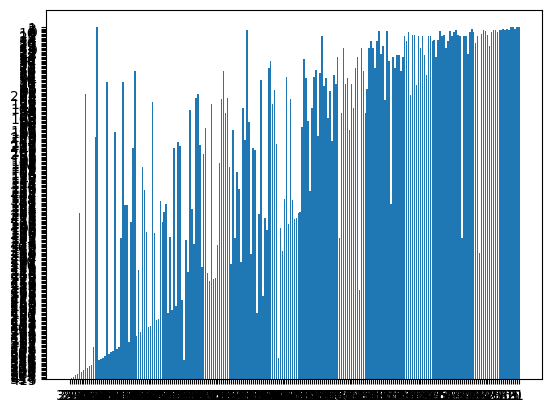

<Figure size 6000x5000 with 0 Axes>

In [281]:
plt.bar(data["feb"],data["jan"])
plt.figure(figsize=(60,50))

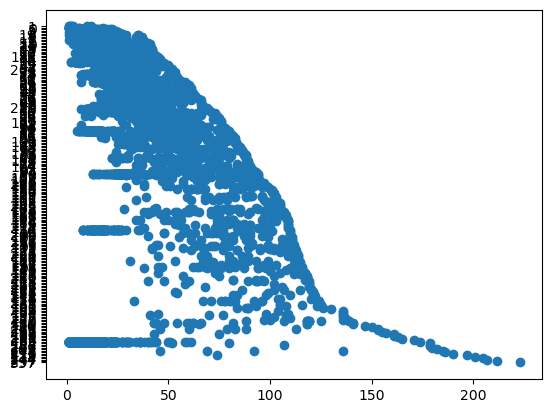

In [282]:
plt.scatter(data["avg"],data["feb"])

### Target Column Selection and Data Preprocessing

In this analysis, we have selected the **target column** which represents the variable we want to predict. This column is a **classification type**, meaning the target variable consists of discrete classes or categories, rather than continuous numerical values. 

Once the target column is identified, the next step is to start with **data preprocessing**. Data preprocessing involves a series of steps to clean and prepare the data before applying machine learning models. It typically includes tasks like handling missing values, encoding categorical variables, normalizing or scaling numerical features, and splitting the dataset into training and testing sets.

By carefully processing the data, we ensure that the machine learning model receives the most suitable input, which improves the model’s performance and accuracy. Let's dive into the preprocessing steps that will be implemented in this analysis.



### Data Preprocessing

Data preprocessing is a crucial step in building machine learning models. It involves preparing the raw data for analysis by cleaning, transforming, and structuring it in a way that can be fed into machine learning algorithms. Below are the main steps involved in data preprocessing.

#### 1. **Handling Missing Values**
In real-world datasets, there may be missing or null values. These need to be handled appropriately, as they can impact the performance of machine learning models.

- **Strategies for handling missing values**:
  - **Remove rows/columns with missing values**: This can be done if the missing data is not significant.
  - **Impute missing values**: Use statistical methods like mean, median, or mode to replace missing values.

<!-- #### 2. **Encoding Categorical Variables** -->
<!-- Machine learning algorithms typically require numerical input. Therefore, categorical variables (e.g., text data) need to be converted into numeric form.

- **Common encoding techniques**:
  - **Label Encoding**: Assigning each category a unique integer.
  - **One-Hot Encoding**: Creating binary columns for each category. -->

#### 2. **Feature Scaling**
Machine learning models such as k-Nearest Neighbors (KNN), Support Vector Machines (SVM), and gradient descent-based models (like Logistic Regression and Neural Networks) benefit from scaling the features to a similar range. This helps improve the model's performance.

- **Common scaling techniques**:
  - **Standardization**: Subtracting the mean and dividing by the standard deviation (Z-score normalization).
  - **Normalization**: Rescaling the data to a specific range, typically 0 to 1.


In [286]:
#Missing Values
data.isnull().sum()

rank    0
city    0
avg     0
jan     0
feb     0
mar     0
apr     0
may     0
jun     0
jul     0
aug     0
sep     0
oct     0
nov     0
dec     0
dtype: int64

In [287]:
#Duplicated
data.duplicated().sum()

0

In [288]:
data.replace("-",np.nan,inplace=True)

In [289]:
data.isnull().sum()

rank      0
city      0
avg       0
jan     542
feb     544
mar     502
apr     537
may     552
jun     593
jul     623
aug     638
sep     740
oct     678
nov      13
dec       4
dtype: int64

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377 entries, 0 to 5376
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rank    5377 non-null   int64 
 1   city    5377 non-null   object
 2   avg     5377 non-null   int64 
 3   jan     4835 non-null   object
 4   feb     4833 non-null   object
 5   mar     4875 non-null   object
 6   apr     4840 non-null   object
 7   may     4825 non-null   object
 8   jun     4784 non-null   object
 9   jul     4754 non-null   object
 10  aug     4739 non-null   object
 11  sep     4637 non-null   object
 12  oct     4699 non-null   object
 13  nov     5364 non-null   object
 14  dec     5373 non-null   object
dtypes: int64(2), object(13)
memory usage: 630.2+ KB


### Change the data type of the data points

In [292]:
for i in data.columns:
    if i!="city":
        data[i]=data[i].apply(pd.to_numeric)

In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377 entries, 0 to 5376
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rank    5377 non-null   int64  
 1   city    5377 non-null   object 
 2   avg     5377 non-null   int64  
 3   jan     4835 non-null   float64
 4   feb     4833 non-null   float64
 5   mar     4875 non-null   float64
 6   apr     4840 non-null   float64
 7   may     4825 non-null   float64
 8   jun     4784 non-null   float64
 9   jul     4754 non-null   float64
 10  aug     4739 non-null   float64
 11  sep     4637 non-null   float64
 12  oct     4699 non-null   float64
 13  nov     5364 non-null   float64
 14  dec     5373 non-null   float64
dtypes: float64(12), int64(2), object(1)
memory usage: 630.2+ KB


In [295]:
for i in data.columns:
    if type(i)!="object":
        if data[i].isnull().sum()!=0:
            mean=data[i].mean()
            data[i].fillna(mean,inplace=True)

C:\Users\hps79\AppData\Local\Temp\ipykernel_8948\2143969856.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(mean,inplace=True)


In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377 entries, 0 to 5376
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rank    5377 non-null   int64  
 1   city    5377 non-null   object 
 2   avg     5377 non-null   int64  
 3   jan     5377 non-null   float64
 4   feb     5377 non-null   float64
 5   mar     5377 non-null   float64
 6   apr     5377 non-null   float64
 7   may     5377 non-null   float64
 8   jun     5377 non-null   float64
 9   jul     5377 non-null   float64
 10  aug     5377 non-null   float64
 11  sep     5377 non-null   float64
 12  oct     5377 non-null   float64
 13  nov     5377 non-null   float64
 14  dec     5377 non-null   float64
dtypes: float64(12), int64(2), object(1)
memory usage: 630.2+ KB


In [297]:
#Duplicates
data.duplicated().sum()

0

# 3.Handling Outliers in Data

Outliers are data points that differ significantly from the other observations in the dataset. These extreme values can distort statistical analyses and machine learning models. In this section, we will explore how to detect, visualize, and handle outliers.

---

### **What are Outliers?**

Outliers are values that lie far from the central tendency (mean, median) of the data. Outliers can be caused by errors, variability in the data, or represent rare events. They can negatively affect models that are sensitive to large deviations, such as linear regression, k-means clustering, and distance-based algorithms like k-NN.

---

### **Detecting Outliers**

There are several methods to detect outliers, including:
- **Visual Methods**: Box plots and scatter plots.
- **Statistical Methods**: Z-scores, IQR (Interquartile Range), and Modified Z-scores.

#### Visualizing Outliers with Boxplot

A **boxplot** is a graphical representation that shows the distribution of the data. Outliers are typically displayed as points outside the "whiskers" of the boxplot.


rank


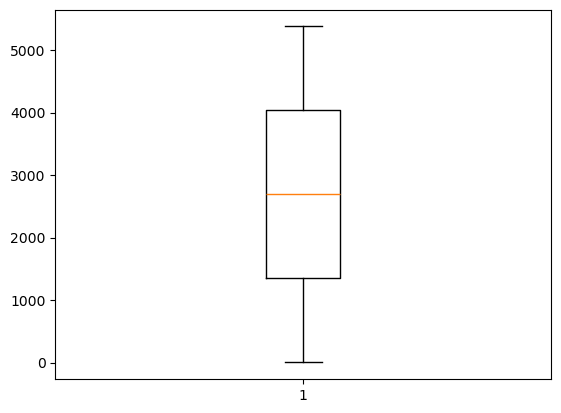

avg


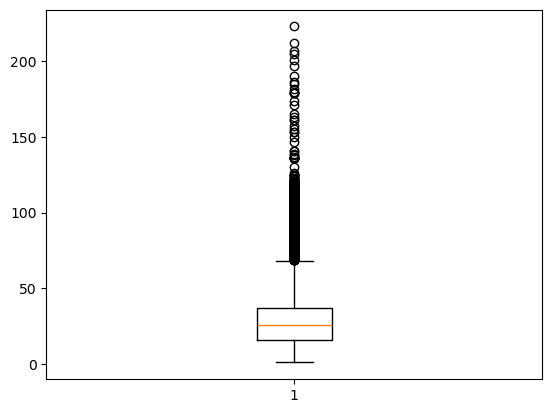

jan


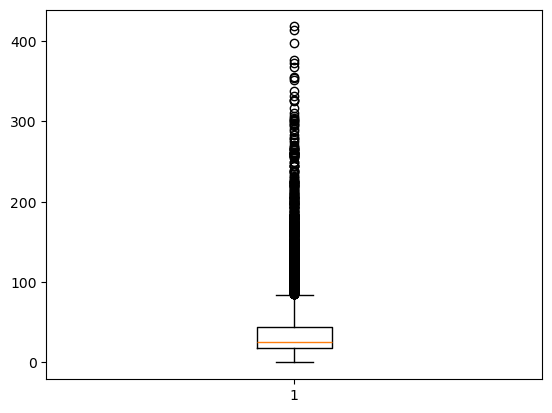

feb


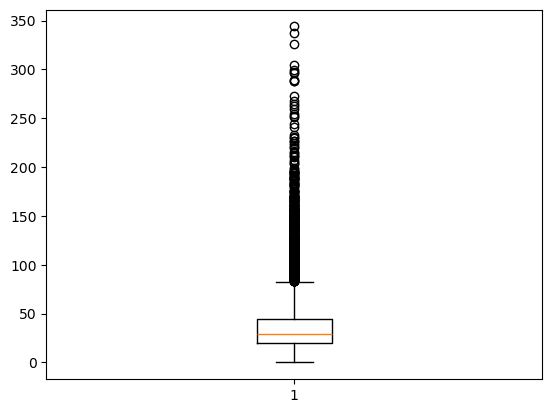

mar


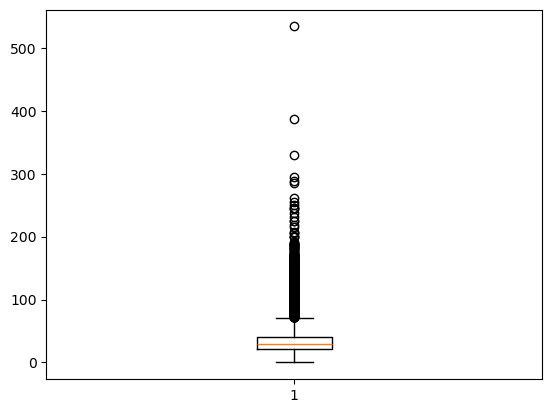

apr


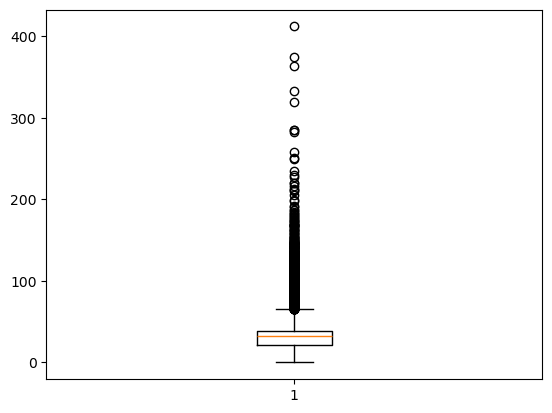

may


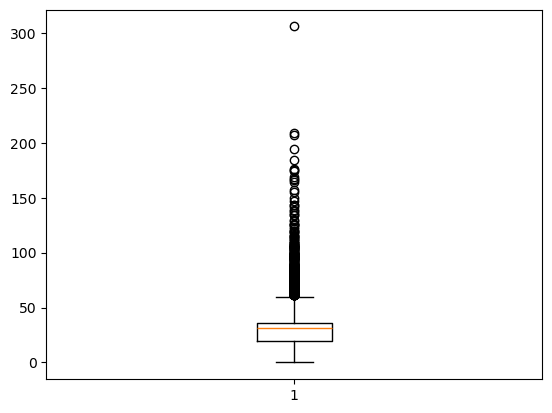

jun


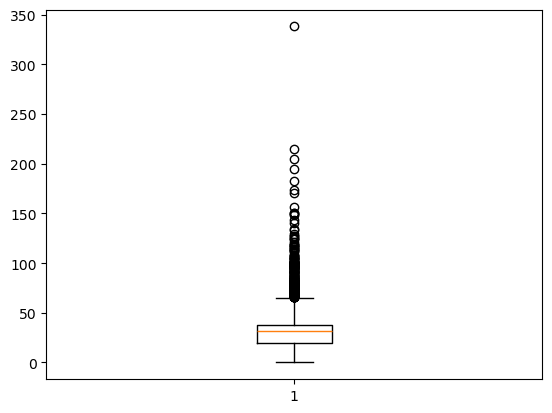

jul


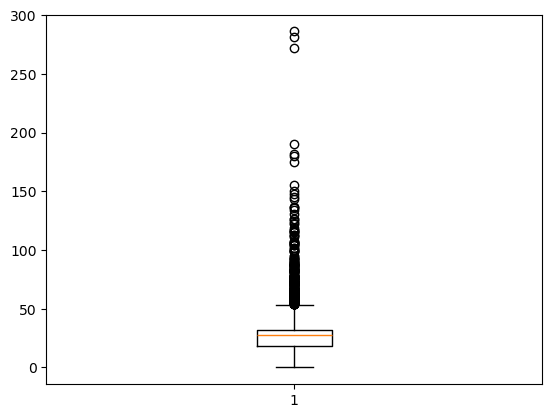

aug


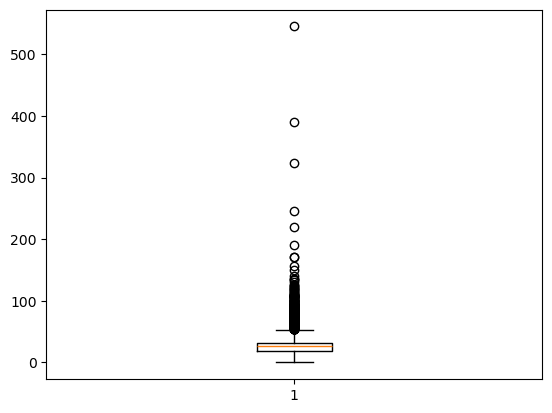

sep


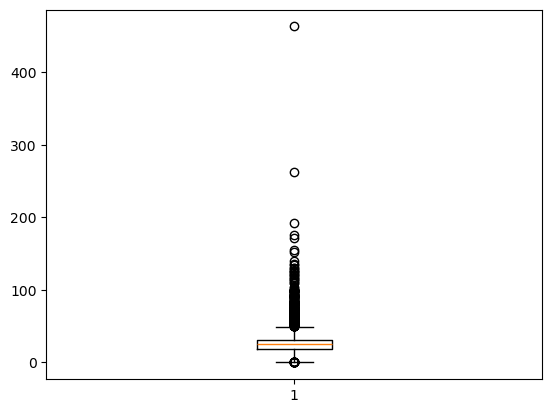

oct


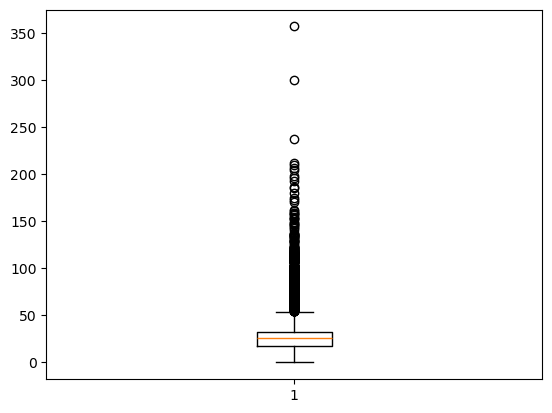

nov


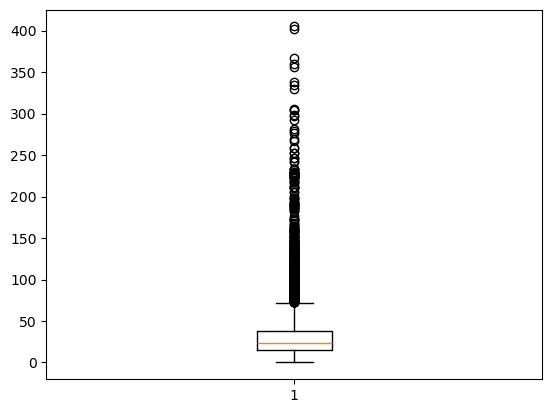

dec


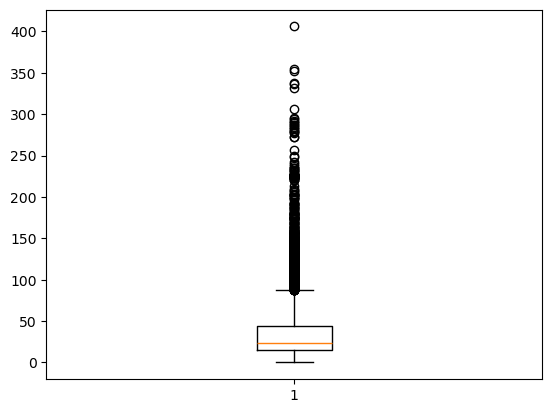

In [299]:
#outliers
for i in data.columns:
     if data[i].dtype!="object":
         plt.boxplot(data[i])
         print(i)
         plt.show()

In [300]:
data.isnull().sum()

rank    0
city    0
avg     0
jan     0
feb     0
mar     0
apr     0
may     0
jun     0
jul     0
aug     0
sep     0
oct     0
nov     0
dec     0
dtype: int64

In [302]:
data.shape

(5377, 15)

In [303]:
data.drop("city",axis=1,inplace=True)

In [304]:
for i in data.columns:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    UP=q3+(1.5*iqr)
    LL=q1-(1.5*iqr)
    data[i]=data[i].loc[(data[i]<UP) & (data[i]>LL)]

rank


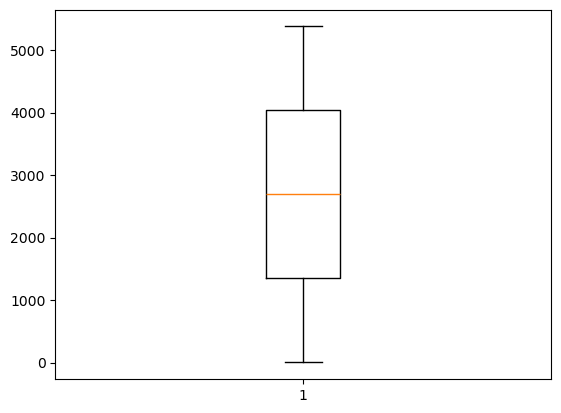

avg


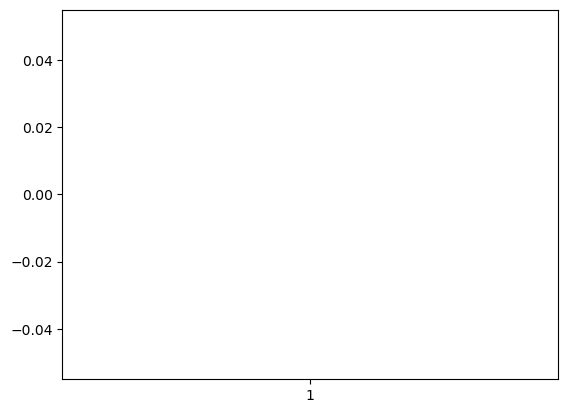

jan


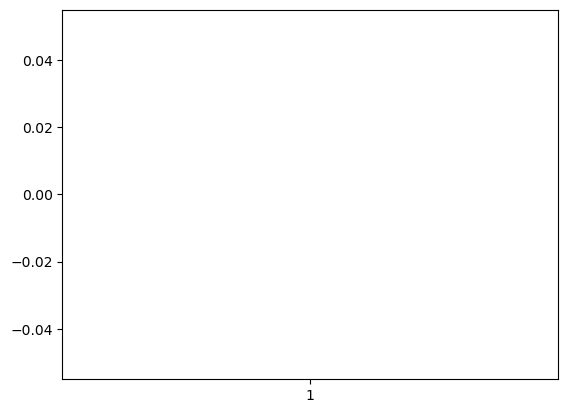

feb


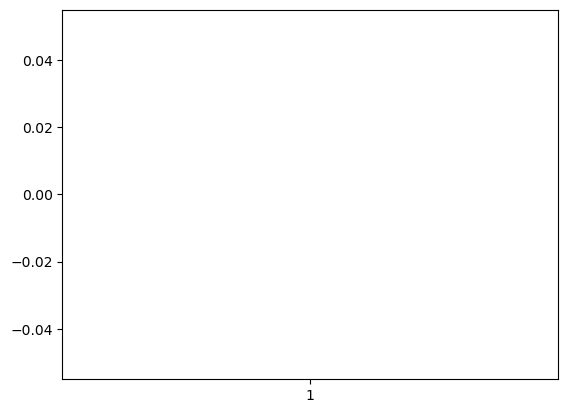

mar


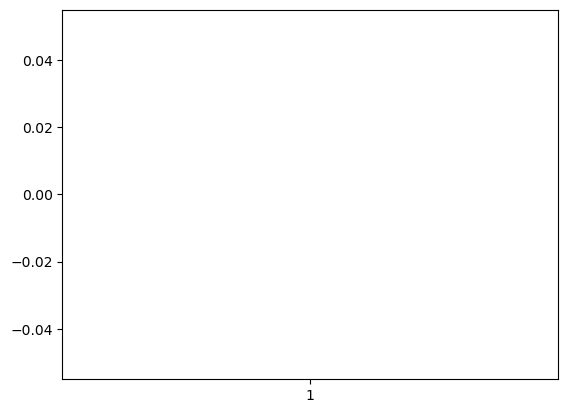

apr


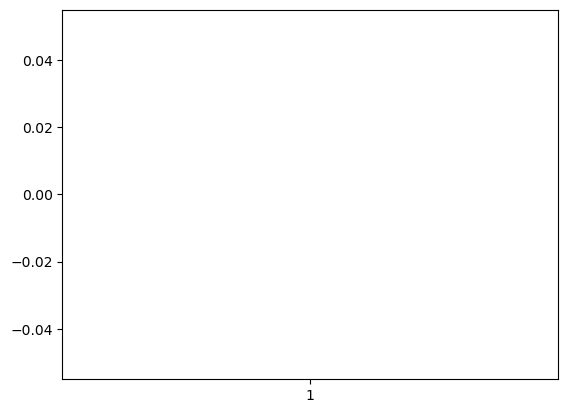

may


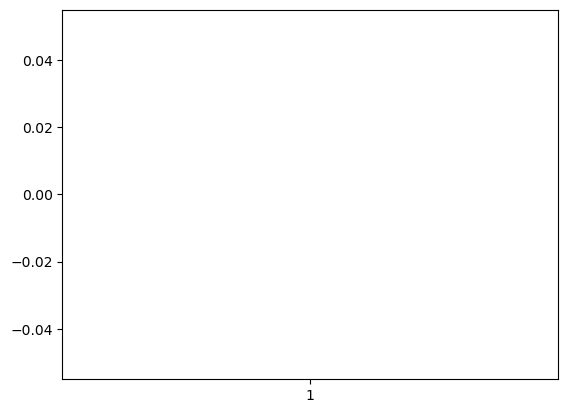

jun


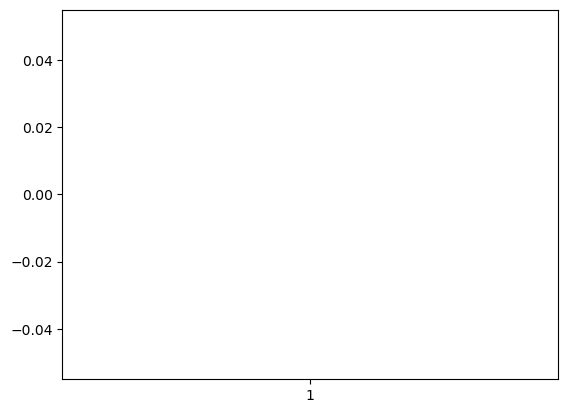

jul


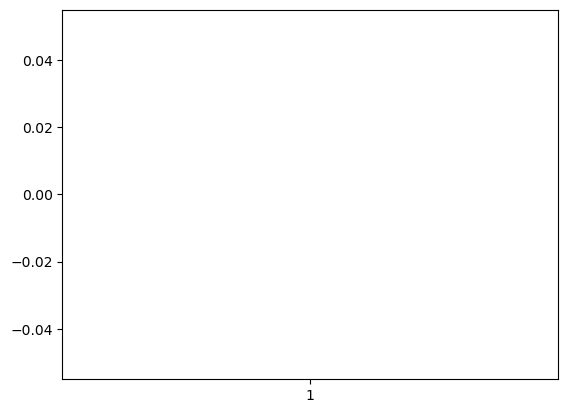

aug


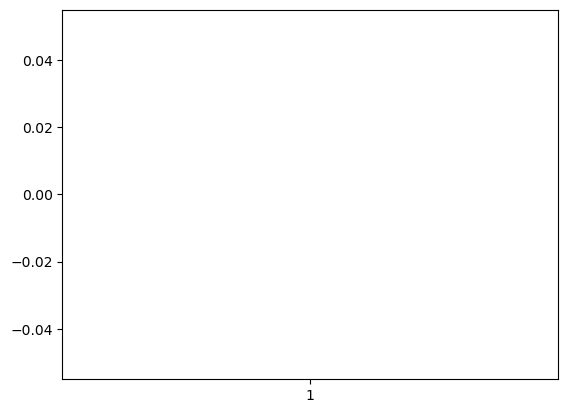

sep


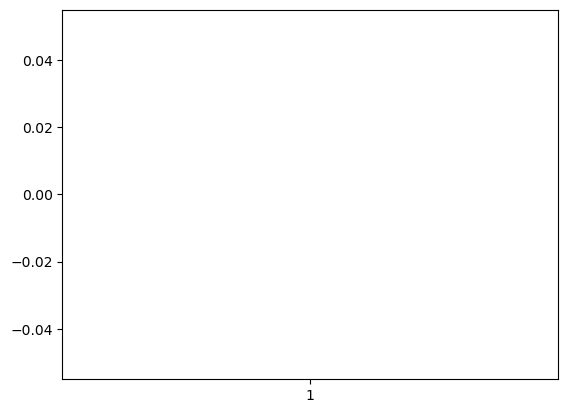

oct


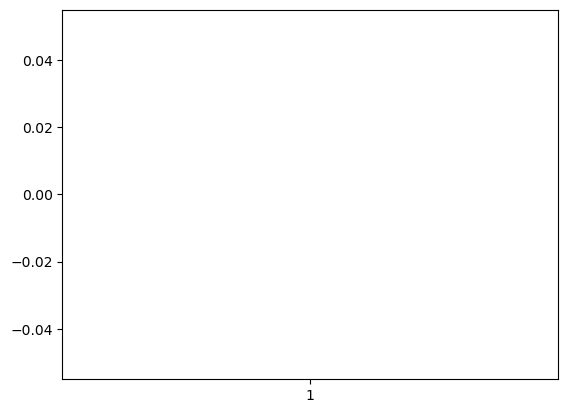

nov


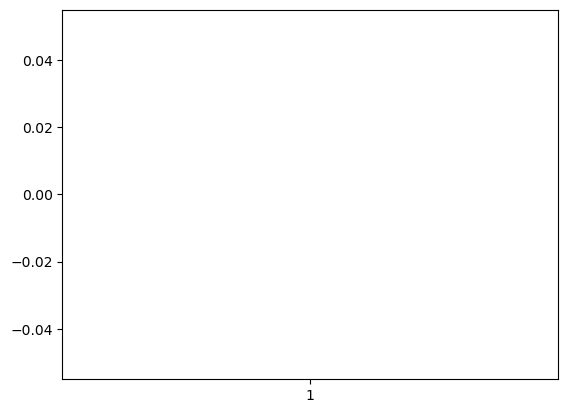

dec


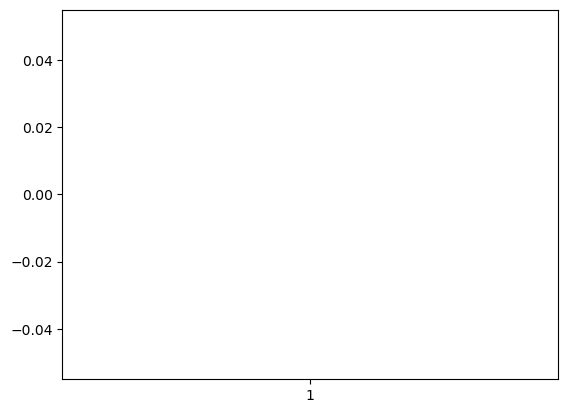

In [305]:
for i in data.columns:
    plt.boxplot(data[i])
    print(i)
    plt.show()

rank


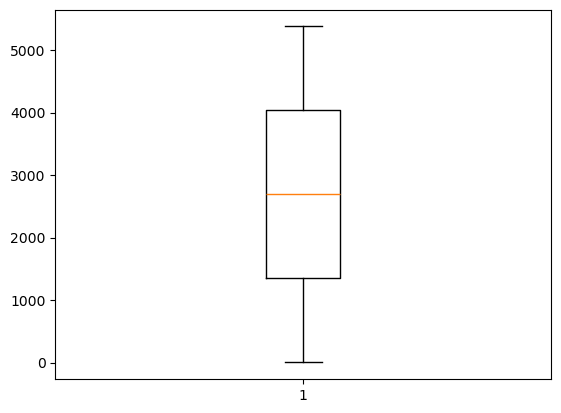

avg


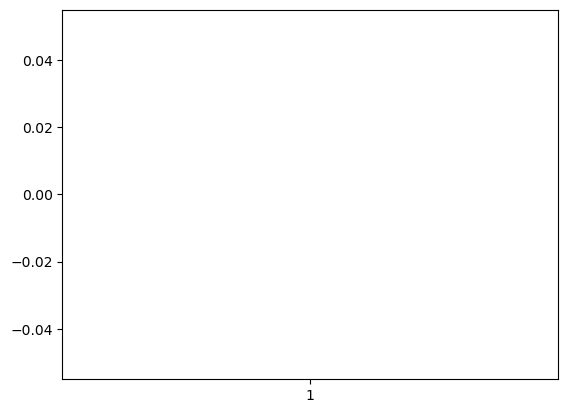

jan


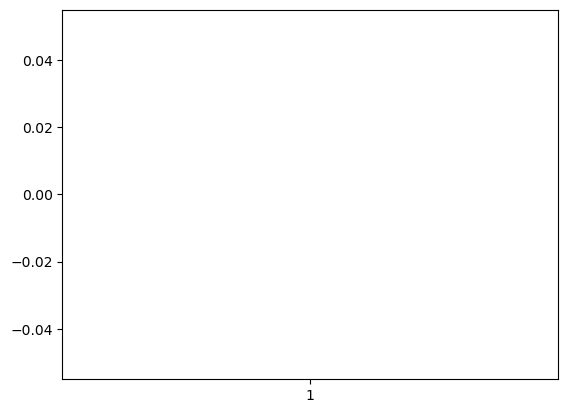

feb


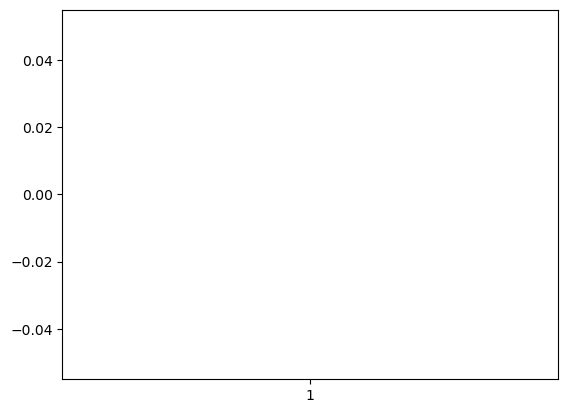

mar


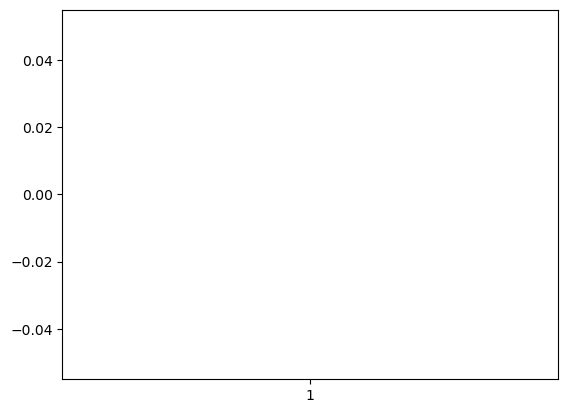

apr


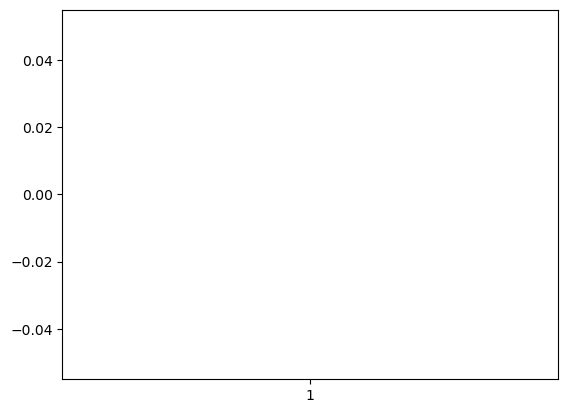

may


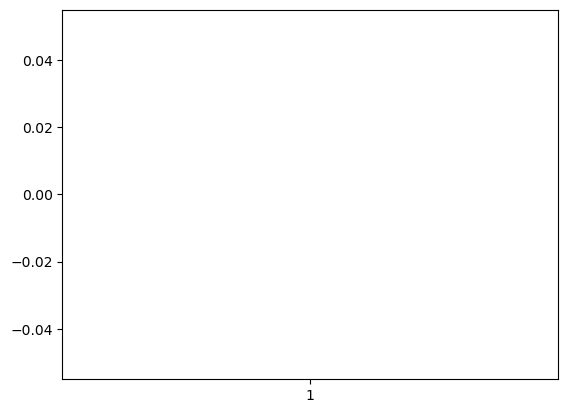

jun


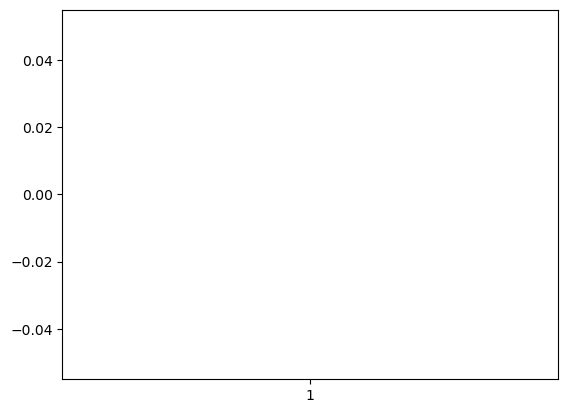

jul


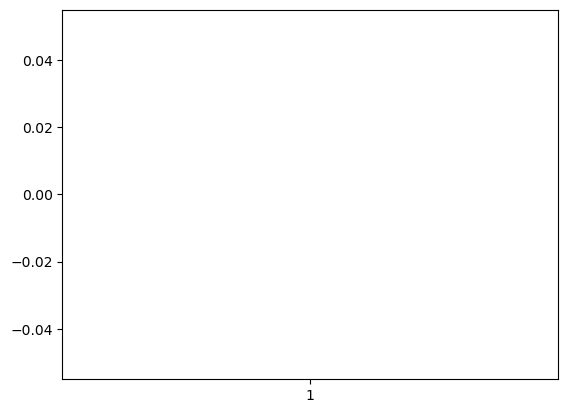

aug


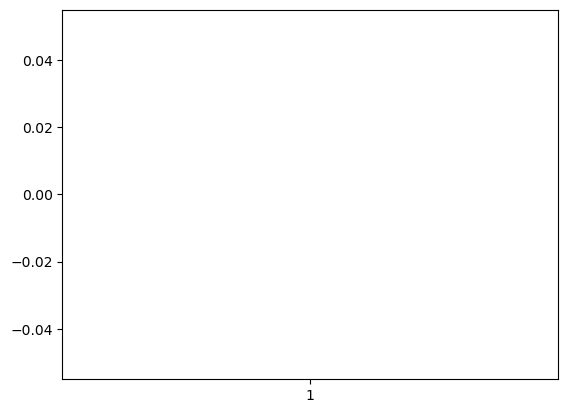

sep


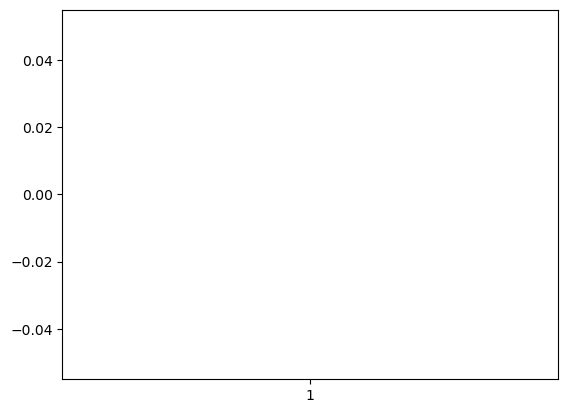

oct


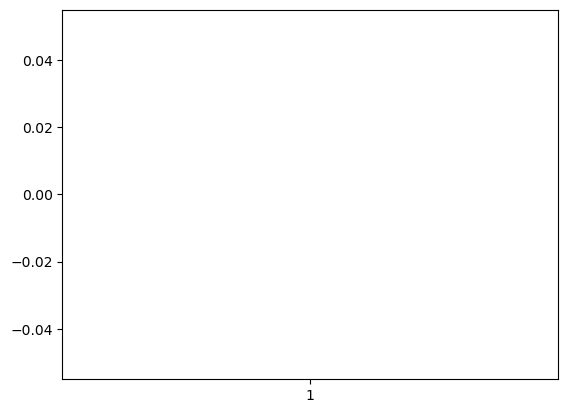

nov


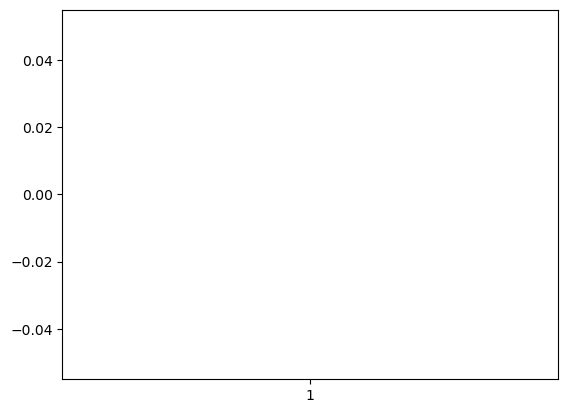

dec


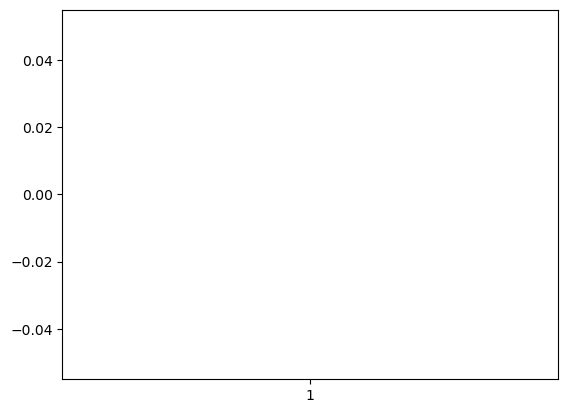

In [306]:
#outliers - cappling
for i in data.columns:
     if data[i].dtype!="object":
         plt.boxplot(data[i])
         print(i)
         plt.show()

In [307]:
data.dropna(inplace=True)

In [308]:
data

rank   avg        jan        feb        mar        apr        may  \
762    763  58.0  76.000000  67.000000  66.000000  57.000000  47.000000   
825    826  54.0  67.000000  67.000000  66.000000  60.000000  56.000000   
831    832  53.0  66.000000  80.000000  57.000000  42.000000  39.000000   
834    835  53.0  83.000000  59.000000  62.000000  52.000000  49.000000   
840    841  53.0  74.000000  55.000000  63.000000  57.000000  49.000000   
858    859  52.0  69.000000  62.000000  62.000000  52.000000  49.000000   
869    870  52.0  59.000000  74.000000  64.000000  56.000000  52.000000   
870    871  52.0  67.000000  49.000000  59.000000  58.000000  51.000000   
875    876  51.0  77.000000  62.000000  69.000000  55.000000  43.000000   
880    881  51.0  74.000000  77.000000  52.000000  62.000000  49.000000   
886    887  51.0  71.000000  41.000000  39.000000  35.000000  41.000000   
913    914  50.0  67.000000  51.000000  58.000000  49.000000  46.000000   
914    915  50.0  73.000000  52.000000  58.000000  59.000000  51.000000   
916    917  50.0  74.000000  57.000000  63.000000  51.000000  44.000000   
917    918  50.0  64.000000  47.000000  56.000000  60.000000  46.000000   
922    923  49.0  78.000000  70.000000  55.000000  53.000000  51.000000   
930    931  49.0  53.000000  64.000000  55.000000  54.000000  52.000000   
931    932  49.0  69.000000  65.000000  60.000000  54.000000  59.000000   
949    950  49.0  72.000000  55.000000  51.000000  61.000000  39.000000   
950    951  49.0  69.000000  58.000000  42.000000  36.000000  38.000000   
954    955  49.0  65.000000  58.000000  58.000000  59.000000  45.000000   
955    956  49.0  56.000000  60.000000  65.000000  62.000000  51.000000   
956    957  49.0  75.000000  54.000000  50.000000  47.000000  46.000000   
959    960  48.0  52.000000  77.000000  67.000000  57.000000  47.000000   
960    961  48.0  51.000000  60.000000  63.000000  48.000000  46.000000   
961    962  48.0  75.000000  53.000000  52.000000  59.000000  47.000000   
963    964  48.0  71.000000  50.000000  54.000000  54.000000  55.000000   
964    965  48.0  60.000000  56.000000  59.000000  50.000000  44.000000   
974    975  48.0  58.000000  61.000000  59.000000  48.000000  45.000000   
975    976  48.0  63.000000  60.000000  60.000000  53.000000  53.000000   
976    977  48.0  65.000000  58.000000  58.000000  57.000000  43.000000   
990    991  48.0  67.000000  51.000000  55.000000  52.000000  47.000000   
991    992  48.0  71.000000  57.000000  59.000000  24.000000  39.000000   
1000  1001  47.0  61.000000  62.000000  62.000000  60.000000  48.000000   
1007  1008  47.0  53.000000  56.000000  64.000000  52.000000  47.000000   
1008  1009  47.0  66.000000  52.000000  56.000000  58.000000  43.000000   
1010  1011  47.0  82.000000  76.000000  61.000000  48.000000  36.000000   
1013  1014  47.0  46.000000  61.000000  37.000000  35.000000  48.000000   
1016  1017  46.0  63.000000  63.000000  59.000000  48.000000  39.000000   
1019  1020  46.0  69.000000  63.000000  61.000000  49.000000  38.000000   
1034  1035  46.0  51.000000  59.000000  55.000000  45.000000  40.000000   
1035  1036  46.0  64.000000  44.000000  47.000000  54.000000  54.000000   
1039  1040  46.0  47.000000  57.000000  57.000000  51.000000  43.000000   
1042  1043  45.0  77.000000  55.000000  54.000000  45.000000  38.000000   
1045  1046  45.0  49.000000  61.000000  56.000000  59.000000  48.000000   
1046  1047  45.0  81.000000  58.000000  44.000000  45.000000  39.000000   
1047  1048  45.0  53.000000  58.000000  59.000000  63.000000  47.000000   
1050  1051  45.0  68.000000  61.000000  48.000000  47.000000  46.000000   
1052  1053  45.0  60.000000  49.000000  41.000000  41.000000  46.000000   
1053  1054  45.0  62.000000  55.000000  50.000000  41.000000  34.000000   
1061  1062  45.0  36.000000  54.000000  42.000000  62.000000  45.000000   
1065  1066  45.0  57.000000  62.000000  65.000000  65.000000  45.000000   
1071  1072  45.0  60.000000  61

### Dealing with Outliers in Classification Models
 **Outliers are data points that differ significantly from the rest of the data. These points may arise due to errors in data collection or they may represent rare, but important instances. The decision of whether or not to remove outliers depends on the nature of your data and model performance.**

**When to Remove Outliers?**
**Data Cleaning**: 
-If outliers are due to errors or noise in the dataset (e.g., incorrect data entries, measurement errors), removing them is usually a good idea because they can skew the model’s learning process.
**Sensitive Algorithms**: 
-Some algorithms, like linear regression or support vector machines, can be highly sensitive to outliers and may benefit from outlier removal to improve performance.

**When Not to Remove Outliers?**

**Increased Complexity of the Model:**
-In some cases, removing outliers can lead to underfitting, especially in complex models like Random Forest or Gradient Boosting. These models tend to handle outliers better since they build multiple decision trees or weak learners, and outliers may provide important boundaries between classes.
**Overfitting:**
-If you remove outliers and see that the accuracy decreases on the test set, it may be an indication that your model is overfitting to the noise in the training data. Overfitting happens when the model learns not only the underlying pattern but also the noise and irregularities, which leads to poor generalization to unseen data.

In [207]:
data.shape

(3982, 14)

In [213]:
corr=data.corr()
corr

rank       avg       jan       feb       mar       apr       may  \
rank  1.000000 -0.981717 -0.271690 -0.365710 -0.456023 -0.473376 -0.554754   
avg  -0.981717  1.000000  0.270297  0.350813  0.435299  0.443655  0.520091   
jan  -0.271690  0.270297  1.000000  0.814344  0.735795  0.630947  0.527289   
feb  -0.365710  0.350813  0.814344  1.000000  0.800161  0.681048  0.575247   
mar  -0.456023  0.435299  0.735795  0.800161  1.000000  0.856258  0.748135   
apr  -0.473376  0.443655  0.630947  0.681048  0.856258  1.000000  0.840810   
may  -0.554754  0.520091  0.527289  0.575247  0.748135  0.840810  1.000000   
jun  -0.461419  0.429222  0.293642  0.339684  0.496227  0.596372  0.737855   
jul  -0.533054  0.488262  0.357791  0.405981  0.544739  0.620558  0.772828   
aug  -0.449591  0.417207  0.421448  0.443166  0.522095  0.537930  0.665144   
sep  -0.518565  0.479612  0.468648  0.516572  0.607269  0.630585  0.732203   
oct  -0.461188  0.430375  0.617730  0.628361  0.698299  0.689147  0.693017   
nov  -0.624293  0.637478  0.501331  0.504042  0.535604  0.494761  0.485888   
dec  -0.569424  0.584945  0.556229  0.579742  0.509653  0.398480  0.341832   

           jun       jul       aug       sep       oct       nov       dec  
rank -0.461419 -0.533054 -0.449591 -0.518565 -0.461188 -0.624293 -0.569424  
avg   0.429222  0.488262  0.417207  0.479612  0.430375  0.637478  0.584945  
jan   0.293642  0.357791  0.421448  0.468648  0.617730  0.501331  0.556229  
feb   0.339684  0.405981  0.443166  0.516572  0.628361  0.504042  0.579742  
mar   0.496227  0.544739  0.522095  0.607269  0.698299  0.535604  0.509653  
apr   0.596372  0.620558  0.537930  0.630585  0.689147  0.494761  0.398480  
may   0.737855  0.772828  0.665144  0.732203  0.693017  0.485888  0.341832  
jun   1.000000  0.802182  0.637244  0.621956  0.492502  0.296241  0.183866  
jul   0.802182  1.000000  0.805565  0.767098  0.641288  0.410280  0.294554  
aug   0.637244  0.805565  1.000000  0.789488  0.691240  0.432898  0.335383  
sep   0.621956  0.767098  0.789488  1.000000  0.789319  0.503040  0.406236  
oct   0.492502  0.641288  0.691240  0.789319  1.000000  0.634905  0.539730  
nov   0.296241  0.410280  0.432898  0.503040  0.634905  1.000000  0.819588  
dec   0.183866  0.294554  0.335383  0.406236  0.539730  0.819588  1.000000

<Figure size 2000x3000 with 0 Axes>

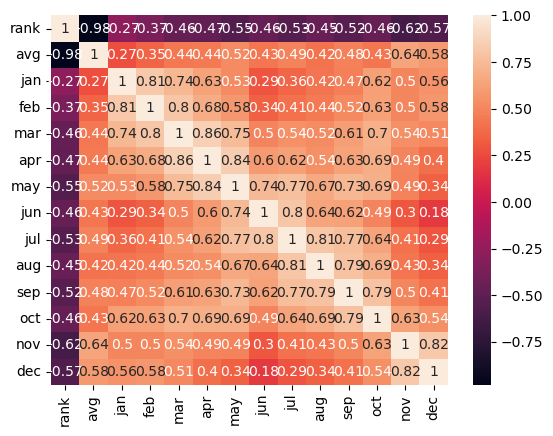

<Figure size 2000x3000 with 0 Axes>

In [209]:
#Heatmap for correlation
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.figure(figsize=(20,30))

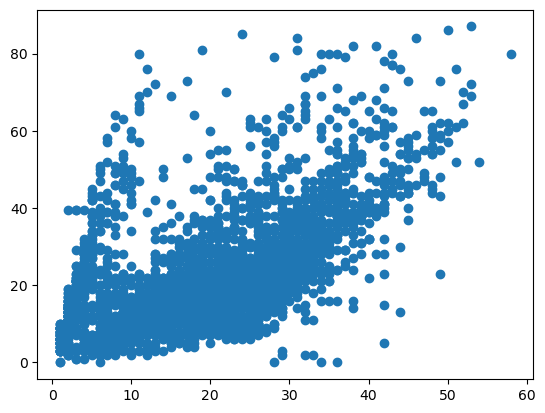

In [217]:
plt.scatter(data["avg"],data["dec"])

#### 4. **Splitting Data into Training and Testing Sets**
After preprocessing, the data needs to be split into two subsets: one for training the model and the other for testing it. This allows us to evaluate the model's performance on unseen data.

- **Common split ratio**: 80% for training, 20% for testing (or 70%-30%, depending on the dataset size).


In [329]:
x=data.drop("avg",axis=1)

In [331]:
y=data[["avg"]]

In [333]:
from sklearn.model_selection import train_test_split

In [335]:
x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle=True,test_size = 0.2)

In [337]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [339]:
y_pred=regressor.predict(x_test)

### Metrics

In [342]:
from sklearn.metrics import r2_score

In [344]:
r2_score(y_pred,y_test)*100

97.1599970793335

### Visualization

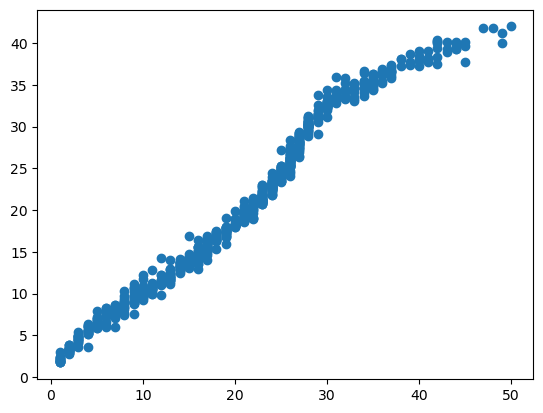

In [347]:
plt.scatter(y_test,y_pred)